In [20]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [21]:
df = pd.read_csv('BTC_Trial_NB.csv')

In [22]:
df.index = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Date,Month,Year,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,...,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-04,04/02/2018,2,2018,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,...,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
2018-02-05,05/02/2018,2,2018,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,...,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2018-02-06,06/02/2018,2,2018,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,...,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
2018-02-07,07/02/2018,2,2018,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,...,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
2018-02-08,08/02/2018,2,2018,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,...,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


<Axes: ylabel='Density'>

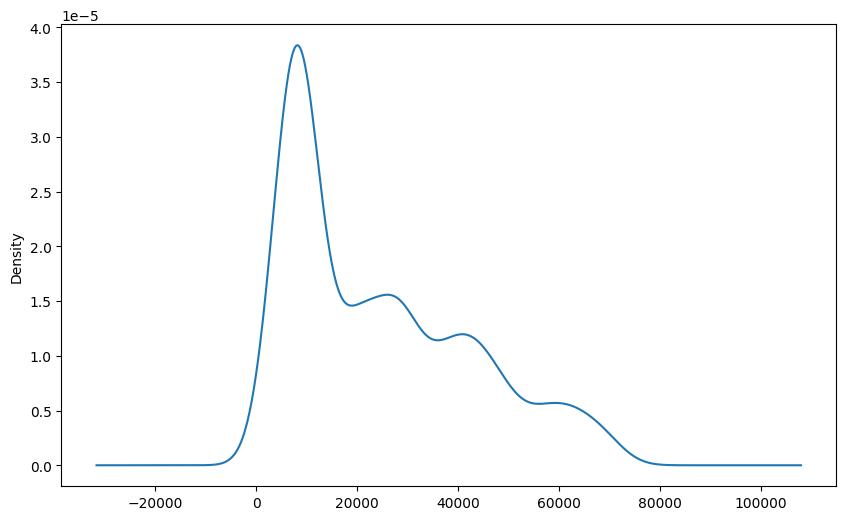

In [23]:
df_close = df['ClosePrice ']
df_close.plot(kind='kde')

Train test set

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train_arima, test_arima = df_close[0:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(4,4,1))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

for i in range(1, len(y),3):
    # predict
    model = ARIMA(history, order=(3,3,1))
    model_fit = model.fit()
    yhat = model_fit.forecast(3)
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

flattened_predictions = [item for sublist in predictions for item in (sublist if isinstance(sublist, np.ndarray) else [sublist])]

print(flattened_predictions)

[26986.91918444623, 27216.011124710014, 27331.52910111347, 27448.136486777687, 28901.930358068665, 29411.40264724883, 30058.672922370104, 29191.950438983713, 29784.371625867163, 30445.524077863043, 30750.30654776836, 31653.163632154403, 32428.861649091585, 36175.41288207473, 38081.534822534464, 40460.76311853681, 35573.03061320332, 37330.02732828225, 39165.09686517987, 36243.30454951836, 37809.955206404855, 38579.42325430111, 35993.73490017396, 36311.19024574672, 36874.288403797174, 35160.834103034635, 35435.591010697106, 35621.97286504957, 37281.66790822287, 37930.26350929318, 38743.13570109873, 37656.61555152978, 38401.04862598606, 39247.336881868425, 38670.836045544114, 39584.625480625305, 40295.06162553889, 37073.367556206606, 37153.75206316915, 37167.38075658152, 35635.50375803455, 35267.7357346157, 34591.695363683175, 37780.47150350395, 37730.581810534604, 38044.00484291994, 37096.89719591061, 37252.89296866551, 37624.703581936454, 37994.435212035154, 38551.184805882454, 38736.78

In [25]:
flattened_predictions = flattened_predictions[:-1]

In [26]:
len(flattened_predictions), len(y)


(231, 231)

In [27]:
predictions_df = pd.DataFrame(flattened_predictions, columns=['Predictions'])
predictions_df.index = y.index
predictions_df

,Predictions
Date,
2023-10-15,26986.919184
2023-10-16,27216.011125
2023-10-17,27331.529101
2023-10-18,27448.136487
2023-10-19,28901.930358
...,...
2024-05-28,70962.423457
2024-05-29,72375.652973
2024-05-30,73952.940262


In [28]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2156
Model:                 ARIMA(3, 3, 1)   Log Likelihood              -18260.418
Date:                Tue, 13 Aug 2024   AIC                          36530.836
Time:                        15:32:43   BIC                          36559.209
Sample:                             0   HQIC                         36541.215
                               - 2156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8014      0.012    -66.020      0.000      -0.825      -0.778
ar.L2         -0.5524      0.015    -36.439      0.000      -0.582      -0.523
ar.L3         -0.2935      0.011    -26.266      0.0

In [29]:
y.shape, predictions_df.shape

((231,), (231, 1))

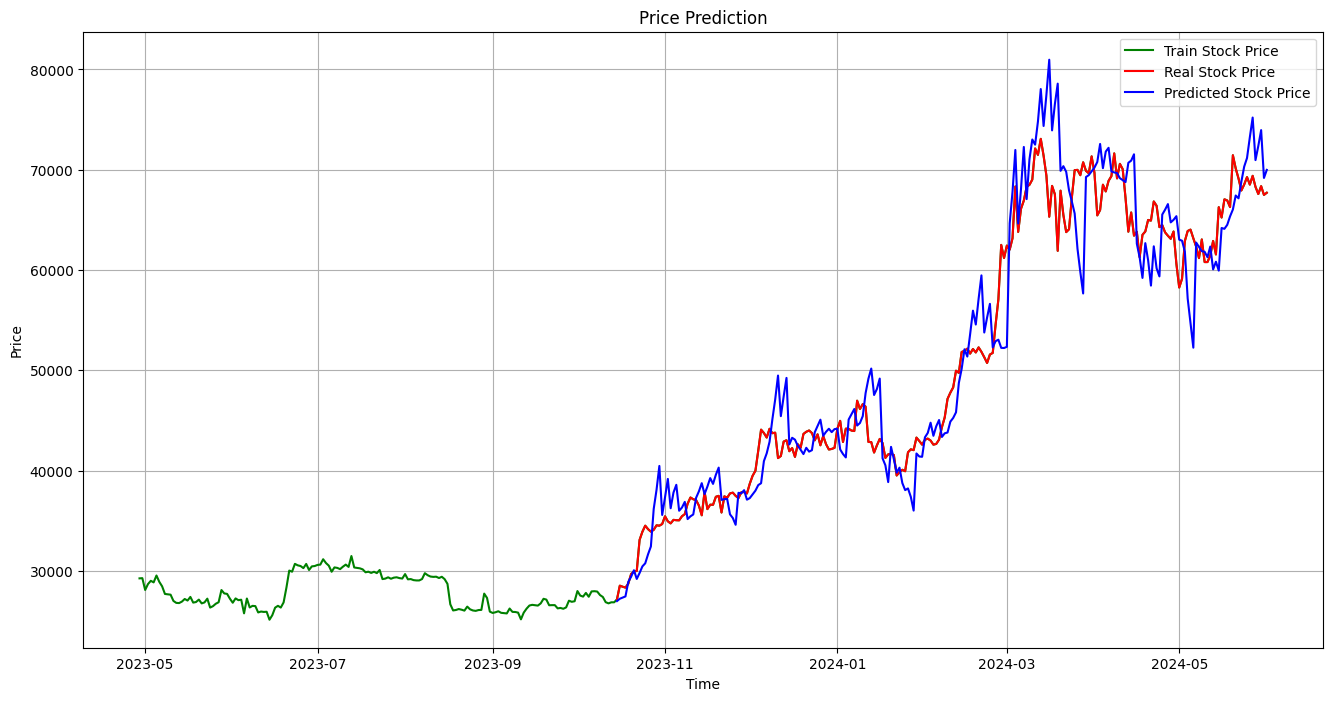

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df_close.index[-400:], df_close.tail(400), color='green', label = 'Train Stock Price')
plt.plot(test_arima.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_arima.index, predictions_df, color = 'blue', label = 'Predicted Stock Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

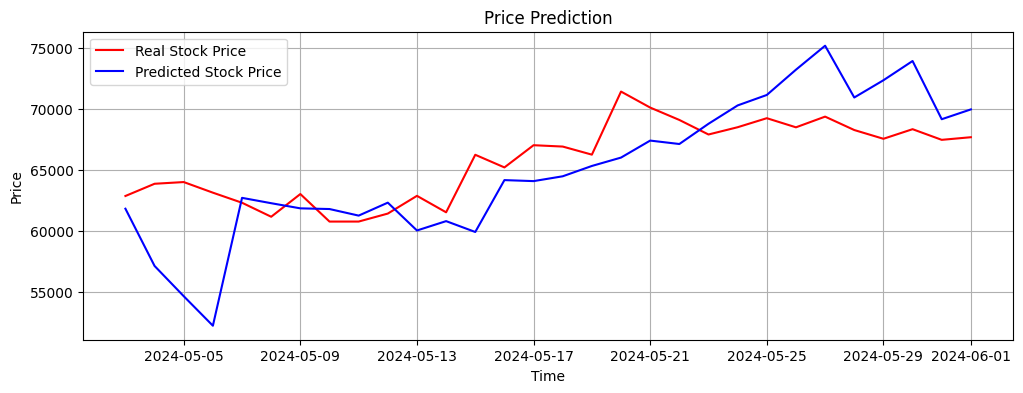

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(test_arima.index[-30:], y[-30:], color = 'red', label = 'Real Stock Price')
plt.plot(test_arima.index[-30:], predictions_df[-30:], color = 'blue', label = 'Predicted Stock Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#NMSE
def nmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    variance = np.var(y_true)
    return mse / variance

#DA
def DA(y_true, y_pred):
    # Convert the arrays to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the direction of change
    true_direction = np.sign(np.diff(y_true))
    pred_direction = np.sign(np.diff(y_pred))
    
    # Compare directions
    correct_direction = np.sum(true_direction == pred_direction)
    total_direction = len(true_direction)
    
    # Calculate directional accuracy
    da = correct_direction / total_direction * 100
    
    return da


In [33]:
y_true = y
y_predi = np.squeeze(predictions_df)

print("RMSE: ", rmse(y_true, y_predi))
print("MAPE: ", mape(y_true, y_predi))
print("NMSE: ", nmse(y_true, y_predi))
print("DA: ", DA(y_true, y_predi))

RMSE:  3945.72606671254
MAPE:  5.534071163457332
NMSE:  0.08838593120606048
DA:  52.60869565217391


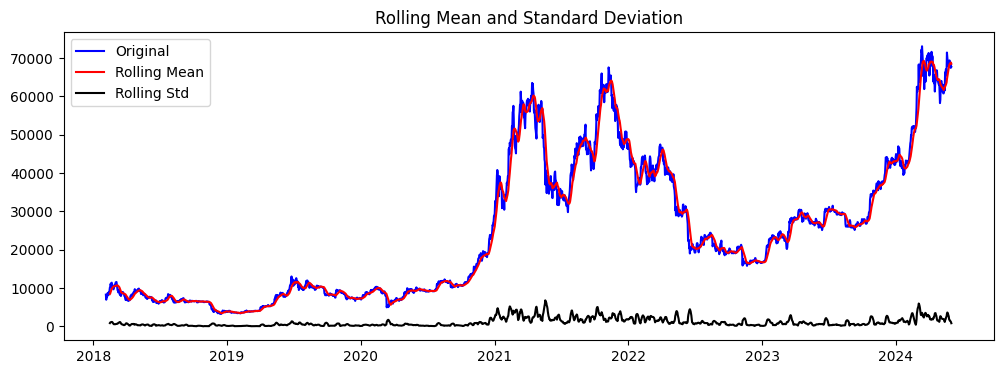

Results of dickey fuller test
Test Statistics                  -0.735927
p-value                           0.837223
No. of lags used                 27.000000
Number of observations used    2282.000000
critical value (1%)              -3.433219
critical value (5%)              -2.862807
critical value (10%)             -2.567445
dtype: float64


In [34]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12, 4))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

In [35]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

<Figure size 1000x600 with 0 Axes>

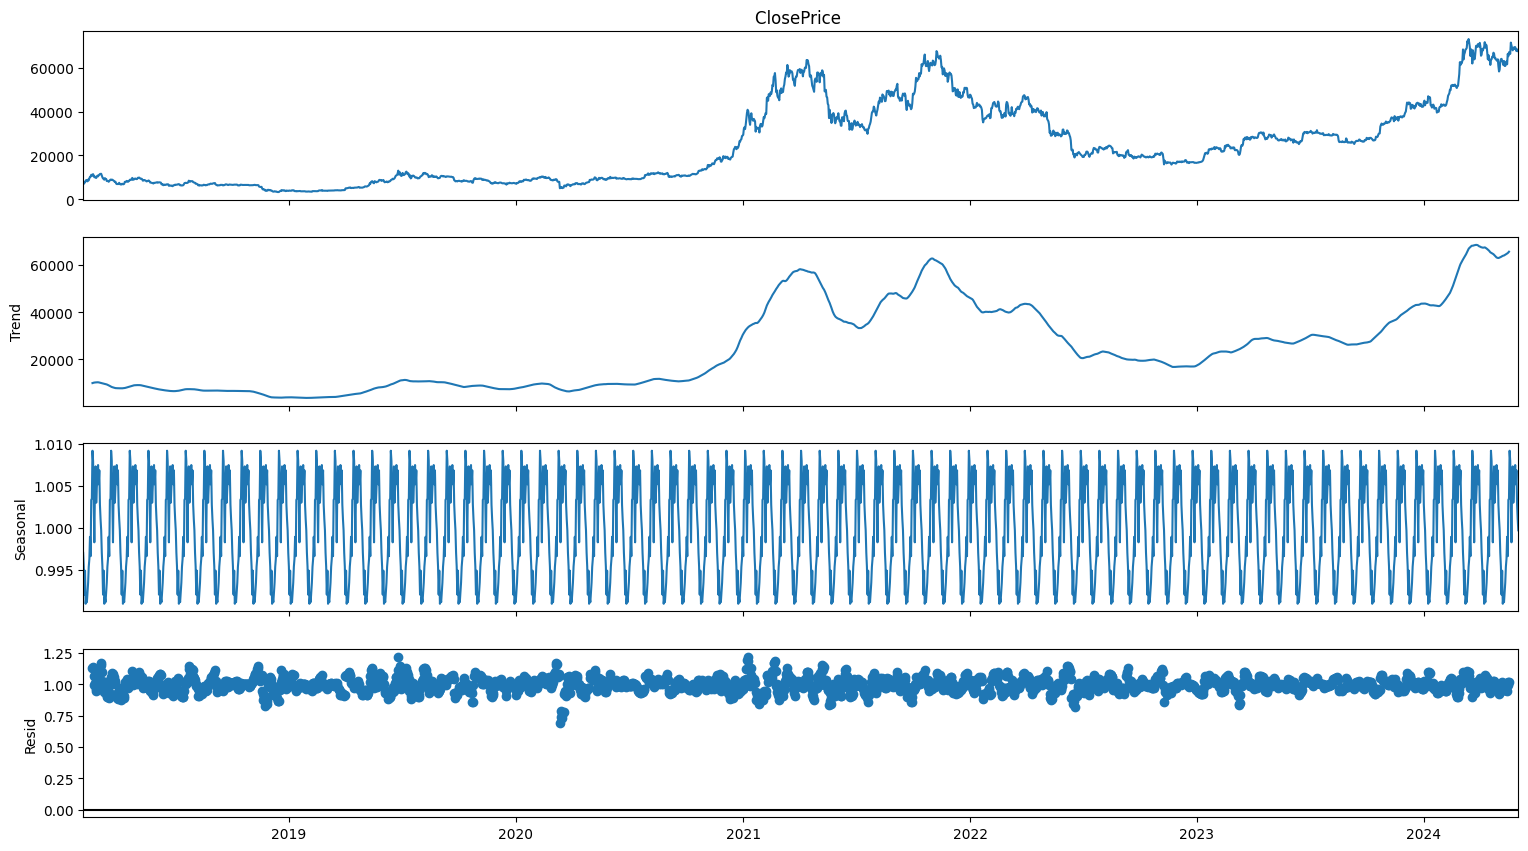

In [36]:
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

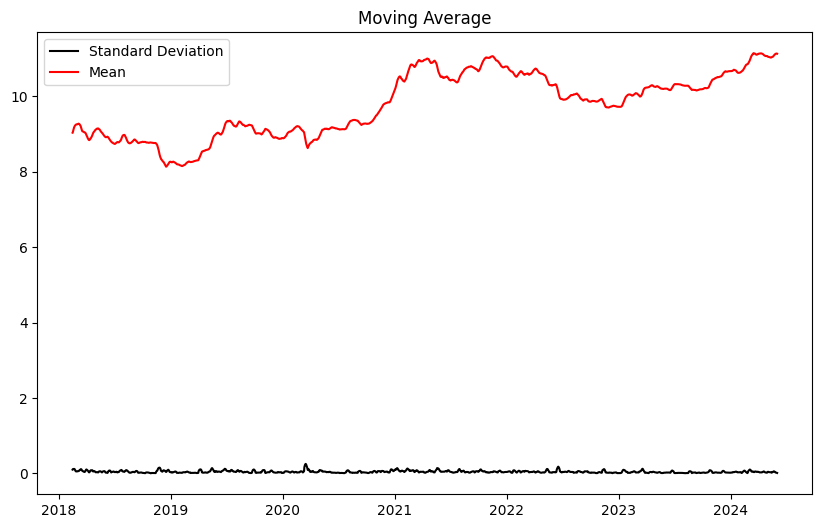

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

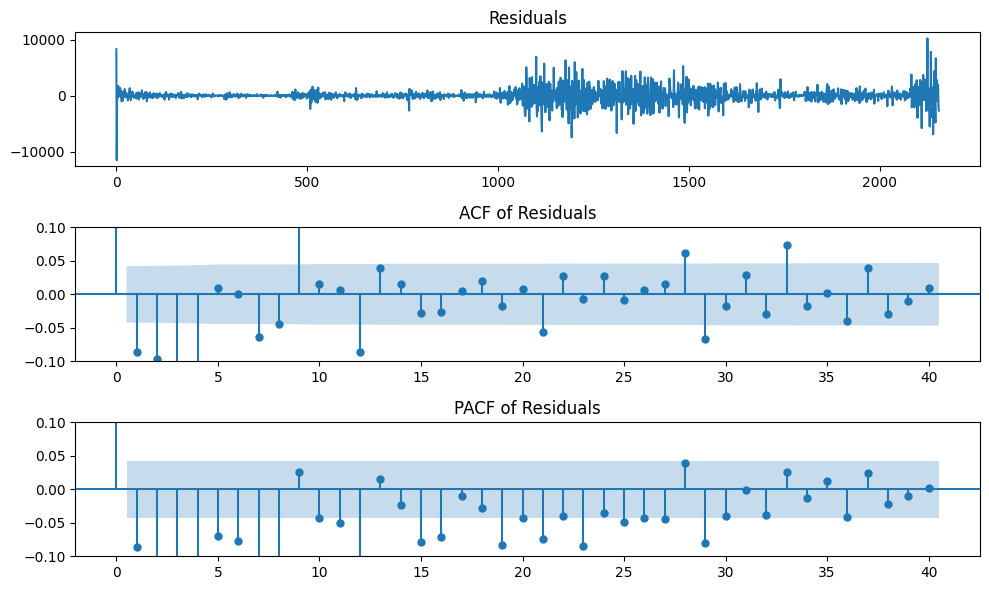

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Obtain residuals
residuals = model_fit.resid

# Create a figure with three vertically stacked subplots
plt.figure(figsize=(10, 6))

# Plot the residuals
plt.subplot(3, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

# Plot ACF of residuals
plt.subplot(3, 1, 2)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Residuals')
plt.ylim(-0.1, 0.1)  # Set y-axis limits for ACF

# Plot PACF of residuals
plt.subplot(3, 1, 3)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Residuals')
plt.ylim(-0.1, 0.1)  # Set y-axis limits for PACF

plt.tight_layout()
plt.show()